In [1]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [2]:
from datasets import load_dataset

# There are two available configurations, "post-fire" and "pre-post-fire."
dataset = load_dataset("DarthReca/california_burned_areas", name="pre-post-fire")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1454: FutureWarning: The repository for DarthReca/california_burned_areas contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/DarthReca/california_burned_areas
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next maj

Generating 0 split: 0 examples [00:00, ? examples/s]

Generating 1 split: 0 examples [00:00, ? examples/s]

Generating 2 split: 0 examples [00:00, ? examples/s]

Generating 3 split: 0 examples [00:00, ? examples/s]

Generating 4 split: 0 examples [00:00, ? examples/s]

In [3]:
!pip install hdf5plugin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 MB 9.4 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt


In [6]:
print(dataset['0'][77].keys())

dict_keys(['post_fire', 'pre_fire', 'mask'])


In [44]:
len(dataset['1'][50]['pre_fire'][0][0])

12

In [79]:
img = np.array(dataset['1'][0]['post_fire'])[:, :, 1:4]
b_axis = img[:,:,0]
g_axis = img[:,:,1]
r_axis =  img[:,:,2]

#img[:, :, 0] = r_axis
#img[:, :, 2] = b_axis


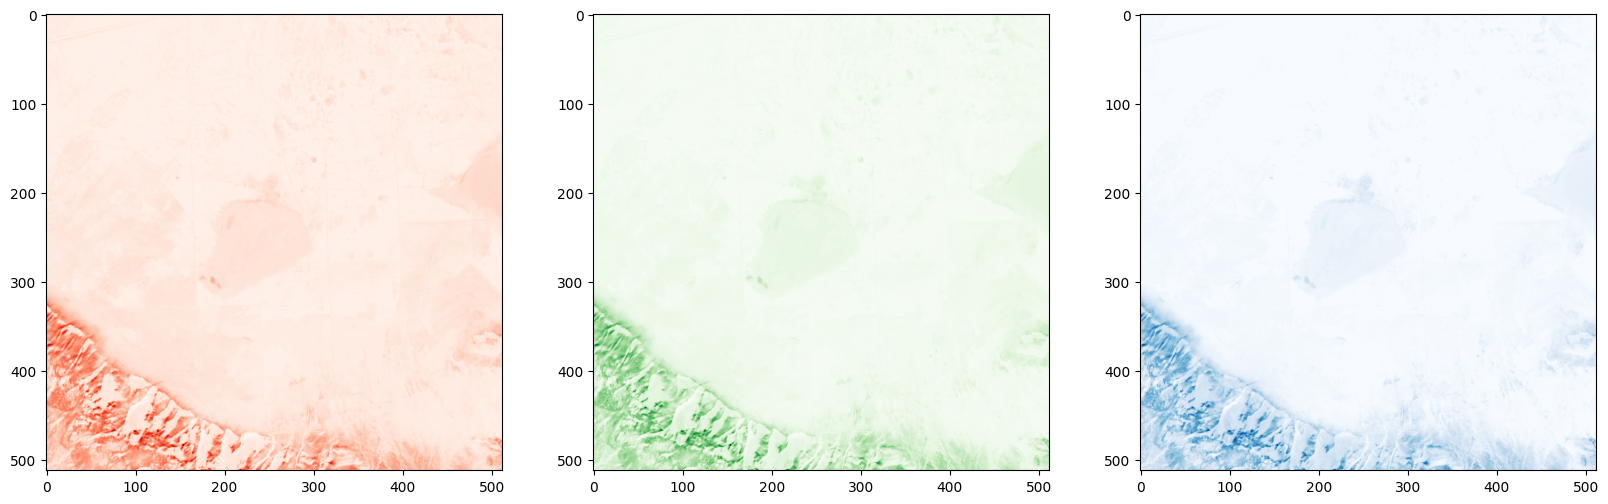

In [58]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(r_axis, cmap='Reds')
ax1 = fig.add_subplot(1,3,2)
ax1.imshow(g_axis, cmap='Greens')
ax1 = fig.add_subplot(1,3,3)
ax1.imshow(b_axis, cmap='Blues')



In [100]:
def adjust_image(image):
  rgb_image = image[:,:,[3, 2, 1]]
  # Normalize the values to range between 0 and 1
  rgb_image = rgb_image.astype(np.float32)
  rgb_image /= np.max(rgb_image)

  # Apply some adjustments to enhance the image visibility
  gamma = 2.0
  rgb_image = np.clip(rgb_image ** (1/gamma), 0, 1)  # Apply gamma correction

  return rgb_image

def print_img(slice, sample_id):
  pre_fire = np.array(dataset[slice][sample_id]['pre_fire'])
  post_fire = np.array(dataset[slice][sample_id]['post_fire'])
  mask = np.array(dataset[slice][sample_id]['mask'])

  pre_fire_rgb = adjust_image(pre_fire)
  post_fire_rgb = adjust_image(post_fire)

  fig = plt.figure(figsize=(20,6))
  ax1 = fig.add_subplot(1,3,1)
  ax1.imshow(pre_fire_rgb)
  ax1 = fig.add_subplot(1,3,2)
  ax1.imshow(post_fire_rgb)
  ax1 = fig.add_subplot(1,3,3)
  ax1.imshow(mask)






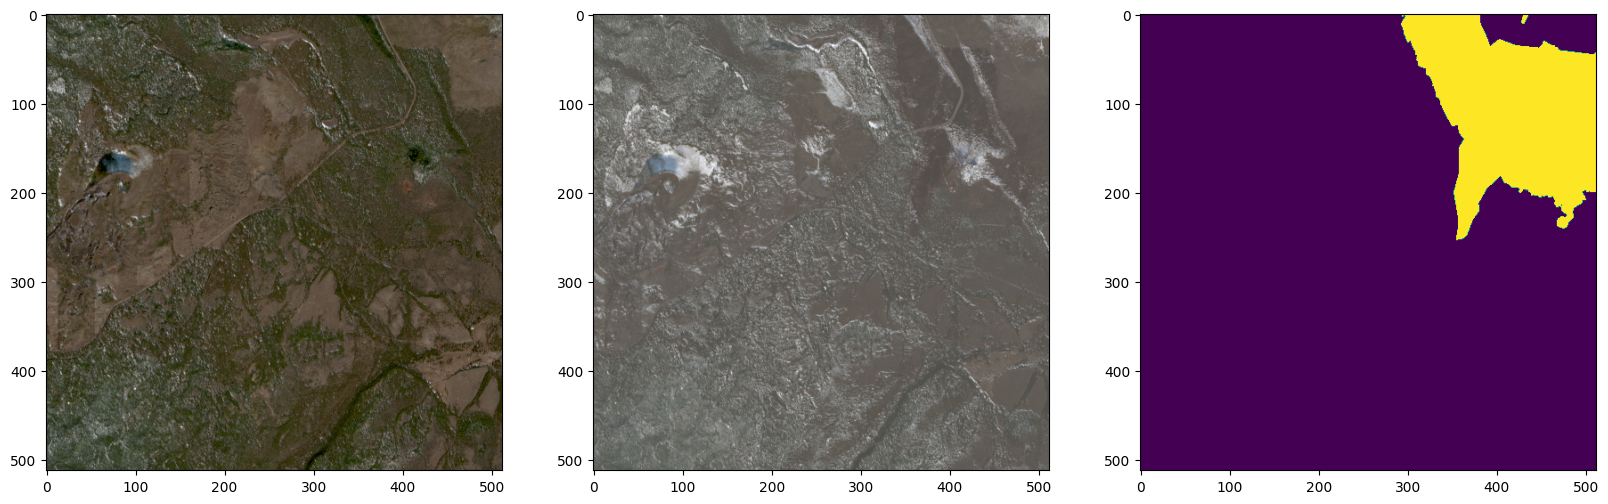

In [101]:
print_img('1', 3)